In [127]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [128]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [129]:
img_size = 28
num_img_test = 10000
num_img_train = 60000
BATCH_SIZE = 500

In [130]:
#np.random.randint?
samples = np.random.randint(0,size =8, high = 59999)
print(samples)

[ 7376  8019  6749 36593   394  2593 33069 12816]


In [131]:
img1 = X_train[samples,:]
img_label = y_train[samples]
print(img_label)

[0 6 9 8 8 8 5 0]


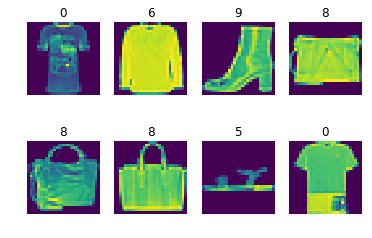

In [132]:
for i , img2 in enumerate(img1):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    plt.title(img_label[i])
    img2 = img2.reshape(28,28)
    plt.imshow(img2)
    
plt.show()

In [133]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [134]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], img_size, img_size,1)
X_test = X_test.reshape(X_test.shape[0],img_size, img_size,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [135]:
Y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [136]:
model = Sequential()
model.add(Convolution2D(32,(3,3), activation='relu', input_shape = (img_size, img_size,1)))
model.add(Convolution2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [137]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs = 6 , verbose=1)

Epoch 1/6
60000/60000 [==============================] - 262s - loss: 0.5261 - acc: 0.8122   
Epoch 2/6
60000/60000 [==============================] - 254s - loss: 0.3202 - acc: 0.8855   
Epoch 3/6
60000/60000 [==============================] - 252s - loss: 0.2688 - acc: 0.9029   
Epoch 4/6
60000/60000 [==============================] - 252s - loss: 0.2343 - acc: 0.9141   
Epoch 5/6
60000/60000 [==============================] - 243s - loss: 0.2073 - acc: 0.9237   
Epoch 6/6
60000/60000 [==============================] - 251s - loss: 0.1848 - acc: 0.9323   


In [139]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

 9984/10000 [============================>.] - ETA: 0s[0.22996808197498322, 0.91879999999999995]
